# **Problem Statement**

Scenario 1. Separate all continuous and categorrical features 

--- 

Scenario 2: Find out number of missing values in each column  

---
Scenario 3: Find of people who have played for more than 400 matches (AtBat) 

---
Scenario 4:  Find out the name of the player who has hit max home runs  

---
Scenario 5:  Find out league wise total number of players  

---

Scenario 6:  Find out division wise total amount of salary invested  

---
Scenario 7: Do univariate analysis on all columns in the dataset using a loop Display 3 charts at a time  

---
Scenario 8: Do bivariate analysis of all columns with League column.  

---
Scenario 9: Find out columns having highest correlation amongst each other.

---
Scenario 10: Find out five most senior players.

---

# **Importing Libraries**

In [1]:
from google.colab import drive
from google.colab import files
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
drive.mount("/content/drive")

Mounted at /content/drive


# **Reading Data**

In [2]:
pd.set_option("display.max_columns",100)

In [3]:
a=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV files/hitters.csv")

In [4]:
a.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [6]:
a.shape

(322, 21)

# **Scenario 1. Separate all continuous and categorrical features**

In [7]:
cat=[]
con=[]
for i in a.columns:
  if a[i].dtypes=="object":
    cat.append(i)
  else:
    con.append(i)

### **Categorical Features**

In [8]:
cat

['Name', 'League', 'Division', 'NewLeague']

### **Continuous Features**

In [9]:
con

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

# **Scenario 2: Find out number of missing values in each column**

In [10]:
a.isna().sum()

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

### **We have 59 missing values in Salary feature**

As it is a continuous feature we can replace the missing values by the mean of all the values. Which is the right way of dealing with missing values in a continuous column / feature

In [11]:
a["Salary"].mean()

535.9258821292775

In [12]:
a["Salary"]=a["Salary"].fillna(a["Salary"].mean())

# **Scenario 3: Find of people who have played for more than 400 matches (AtBat)**

In [13]:
a.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A


In [14]:
a[a["AtBat"]>=400].iloc[:,0:2]

,Name,AtBat
2,Alvin Davis,479
3,Andre Dawson,496
5,Alfredo Griffin,594
9,Andre Thornton,401
10,Alan Trammell,574
...,...,...
317,Willie McGee,497
318,Willie Randolph,492
319,Wayne Tolleson,475
320,Willie Upshaw,573


### **We have 151 players who have played for more than 400 matches.**

# **Scenario 4: Find out the name of the player who has hit max home runs**

In [15]:
a.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A


In [16]:
a[["Name","HmRun"]].sort_values(by="HmRun",ascending=False)[0:1]

,Name,HmRun
136,Jesse Barfield,40


# **Scenario 5: Find out league wise total number of players**

In [17]:
a.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A


In [18]:
a.groupby(by="League")["Name"].count()

League
A    175
N    147
Name: Name, dtype: int64

# **Scenario 6: Find out division wise total amount of salary invested**

In [19]:
a.head(2)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N


In [20]:
a.groupby(by="Division")["Salary"].sum()

Division
E    95536.930700
W    77031.203346
Name: Salary, dtype: float64

# **Scenario 7: Do univariate analysis on all columns in the dataset using a loop Display 3 charts at a time**


### **As Name column is a discrete feature we can drop it and provide unvariate analysis for the rest**

In [21]:
U=a.drop(labels=["Name"],axis=1)

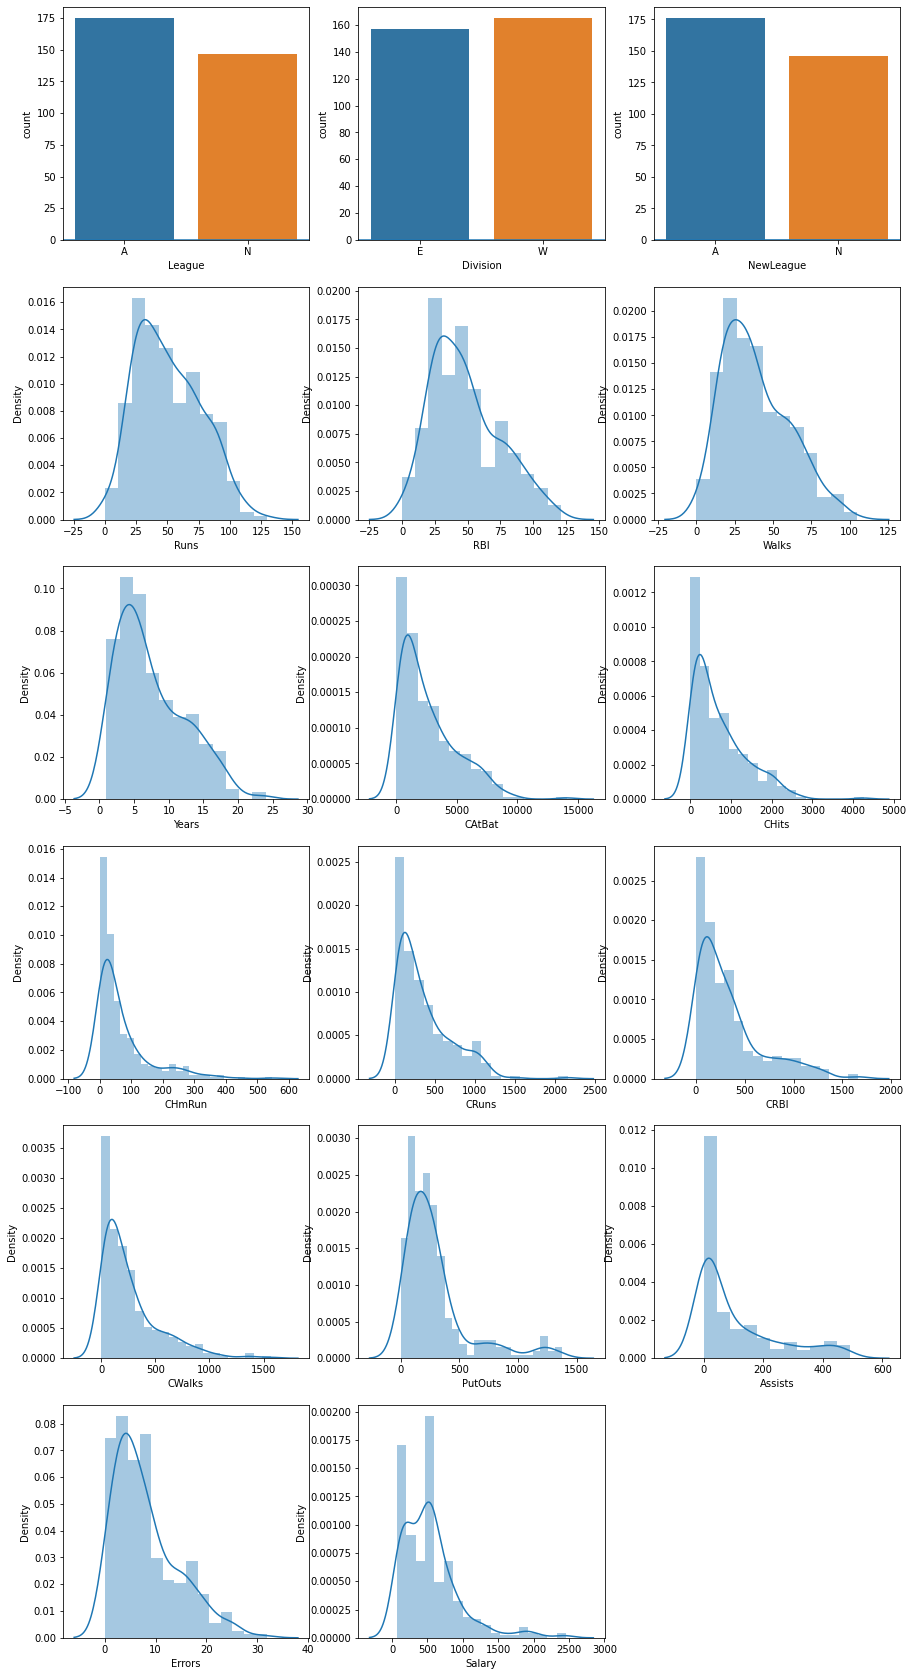

In [22]:
cat=[]
con=[]
for i in U.columns:
  if U[i].dtypes=="object":
    cat.append(i)
  else:
    con.append(i)

plt.figure(figsize=(15,30))
cols=3
tot_rows=U.shape[1]
rows=tot_rows//cols

plt_no=1
for i in con:
  plt.subplot(rows,cols,plt_no)
  sb.distplot(U[i])
  plt_no+=1

plt_no=1
for i in cat:
  plt.subplot(rows,cols,plt_no)
  sb.countplot(U[i])
  plt_no+=1

# **Scenario 8: Do bivariate analysis of all columns with League column.**

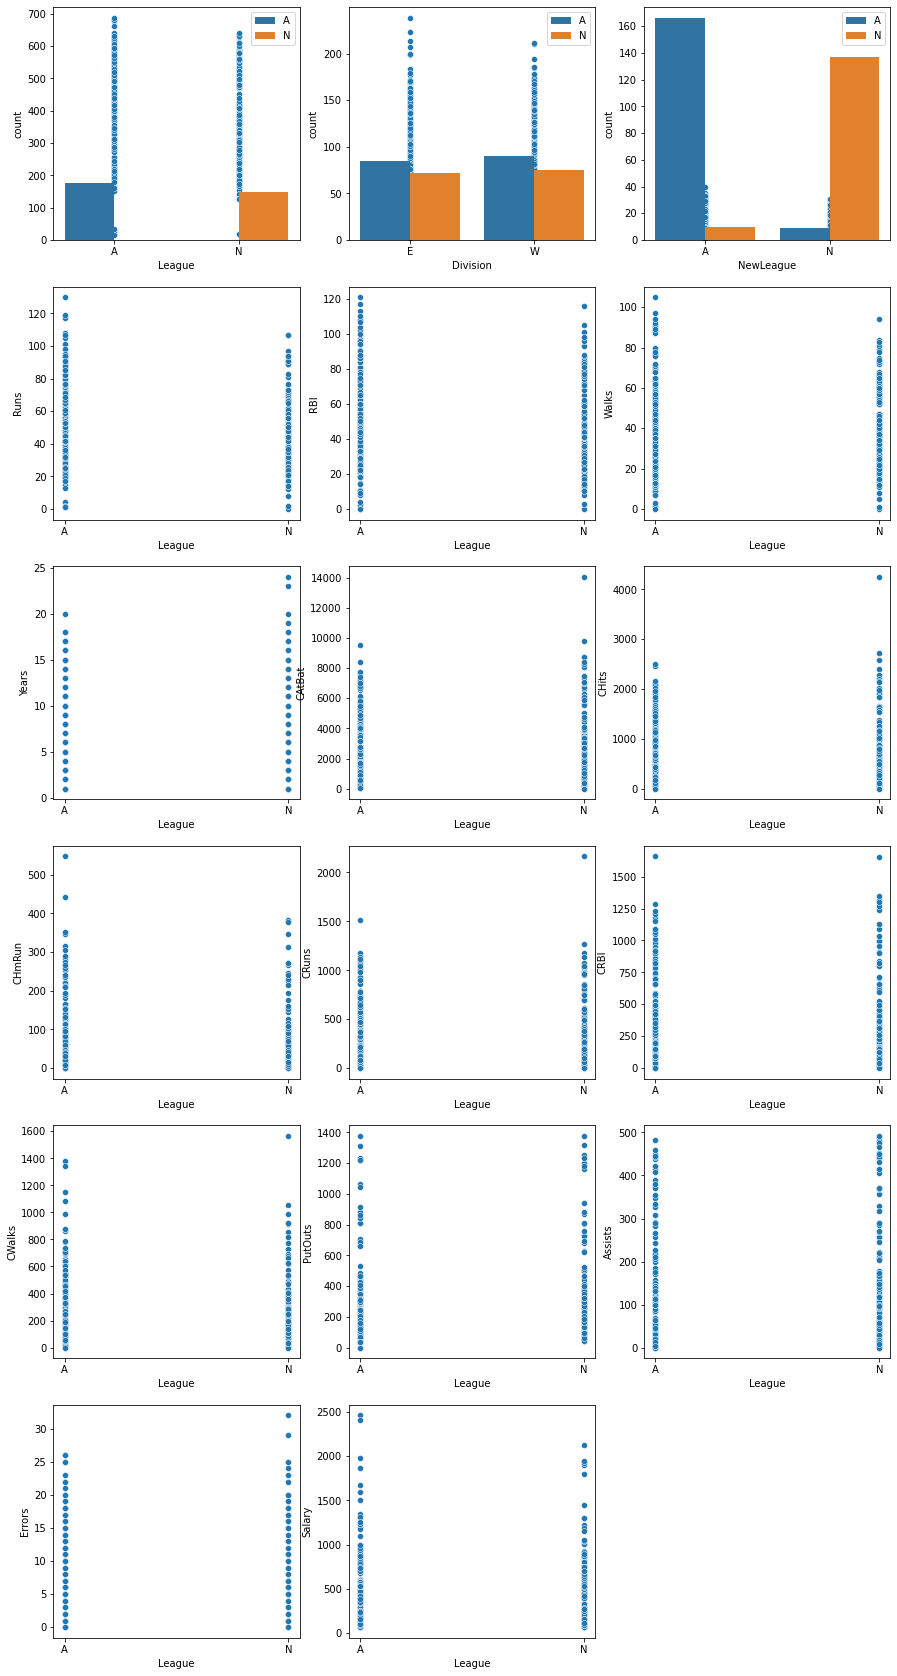

In [23]:
cat=[]
con=[]
for i in U.columns:
  if U[i].dtypes=="object":
    cat.append(i)
  else:
    con.append(i)

plt.figure(figsize=(15,30))
cols=3
tot_rows=U.shape[1]
rows=tot_rows//cols

plt_no=1
for i in cat:
  plt.subplot(rows,cols,plt_no)
  sb.countplot(U[i],hue=U["League"])
  plt_no+=1

plt_no=1
for i in con:
  plt.subplot(rows,cols,plt_no)
  sb.scatterplot(U["League"],U[i])
  plt_no+=1

# **Scenario 9: Find out columns having highest correlation amongst each other.**

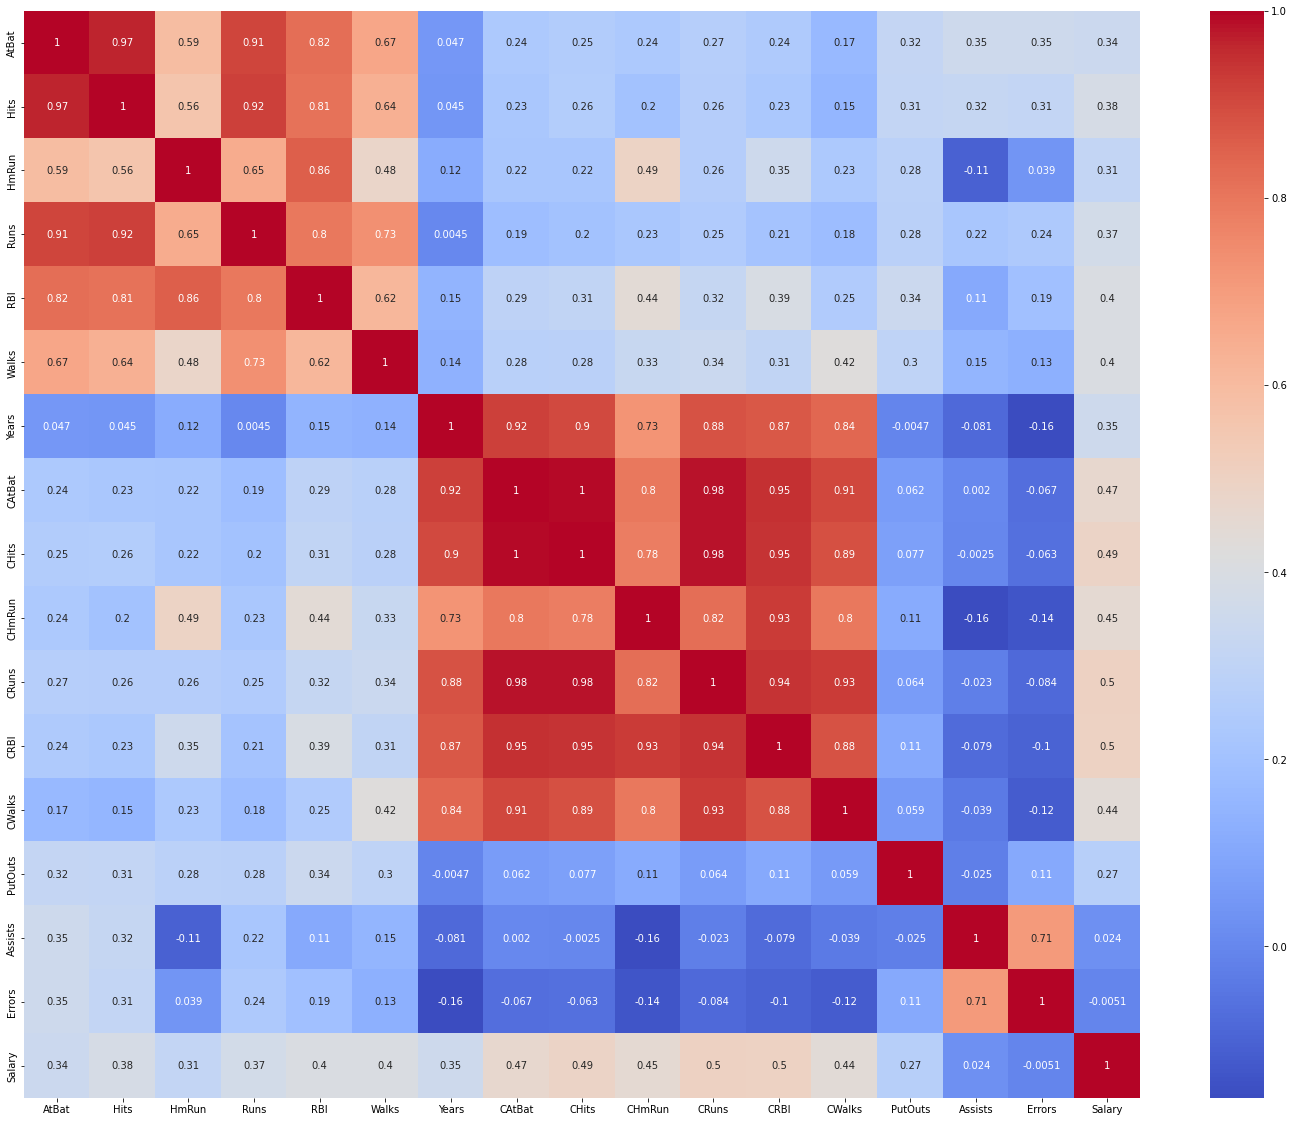

In [24]:
plt.figure(figsize=(25,20))
sb.heatmap(a.corr(),annot=True,cmap="coolwarm");

# **Scenario 10: Find out five most senior players.**

In [25]:
a.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A


In [26]:
a[["Name","Years"]].sort_values(by="Years",ascending=False)[0:6]

,Name,Years
236,Pete Rose,24
302,Tony Perez,23
121,Graig Nettles,20
249,Reggie Jackson,20
306,Ted Simmons,19
245,Rick Dempsey,18


# **End**